In [166]:
import numpy
import random
from math import *
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [27]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
      
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate
        
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    def train(self, inputs_list, targets_list):

        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    def query(self, inputs_list):
        
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [28]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [29]:
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [114]:
epochs = 5

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [115]:
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

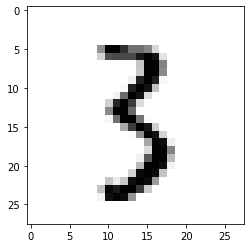

In [287]:
randDigit = random.randint(0, len(test_data_list));
all_values = test_data_list[randDigit].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [288]:
for index, item in enumerate(n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01) * 100):
    print(str(index) + ' - ' + str(math.floor(item)) + ' %')

0 - 0 %
1 - 1 %
2 - 0 %
3 - 99 %
4 - 0 %
5 - 0 %
6 - 0 %
7 - 0 %
8 - 0 %
9 - 0 %
